# ARIM情報活用講座：　メトリックス 編　
# XRD編

# Google Colabにおける環境設定
google colab環境でなければ実行不要

In [1]:
!git clone https://github.com/ARIM-Training/Training_python_9.git
%cd Training_python_9

[WinError 2] 指定されたファイルが見つかりません。: 'Training_python_9'
C:\Users\Matsunami\Dropbox\9_GitHub_python\ARIM_python_9_XRD対象予測\notebooks


Cloning into 'Training_python_9'...
fatal: unable to access 'https://github.com/ARIM-Training/Training_python_9.git/': Failed to connect to github.com port 443 after 21067 ms: Timed out


### 汎用ライブラリのインポート

In [1]:
import pickle
import sys

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import metrics
from sklearn.model_selection import cross_val_predict
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from six import StringIO
import pydotplus 
from IPython.display import Image
from utils import plot_confusion_matrix

sys.path.append("..")
random_state = 42
classnames = ['Triclinic', 'Monoclinic', 'Orthorombic', 'Tetragonal', 'Trigonal', 'Hexagonal', 'Cubic']

### データセットファイルの読み込み

In [11]:
train_data = pd.concat((pd.read_csv('data/train.csv'), pd.read_csv('data/test.csv')))
train_data

,1,2,3,4,5,6,7,8,9,10,...,q_1,q_2,q_3,q_4,q_5,q_6,q_7,q_8,q_9,q_10
0,12.800197,14.940639,17.394581,18.505399,18.670426,20.689381,20.721964,21.964808,23.583201,23.846828,...,0.908513,1.059634,1.232431,1.310470,1.322053,1.463536,1.465816,1.552683,1.665523,1.683873
1,16.166407,16.435808,20.174793,22.512152,23.360235,24.111671,25.403932,25.975734,26.334719,28.176936,...,1.146014,1.164981,1.427516,1.590881,1.649996,1.702299,1.792073,1.831724,1.856594,1.983930
2,14.330435,15.183582,16.201044,19.282158,20.098901,23.758891,23.918898,25.133432,25.831712,27.093006,...,1.016587,1.076764,1.148453,1.364967,1.422202,1.677753,1.688888,1.773300,1.821741,1.909068
3,8.402510,15.542676,16.850628,18.598695,20.147478,20.727534,21.372799,24.718322,25.392239,25.669955,...,0.597087,1.102075,1.194174,1.317019,1.425604,1.466205,1.511327,1.744471,1.791261,1.810526
4,12.409748,12.896543,14.923789,14.988381,16.557540,17.135276,17.988328,19.821608,19.853406,20.744413,...,0.880910,0.915322,1.058446,1.063001,1.173550,1.214197,1.274159,1.402778,1.405006,1.467386
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46063,4.636163,9.279936,13.939044,16.705221,17.345495,18.621440,19.142042,21.821121,23.335440,23.501696,...,0.329654,0.659308,0.988961,1.183943,1.228980,1.318615,1.355141,1.542649,1.648269,1.659848
46064,12.550223,21.825920,25.254231,26.979420,31.634941,33.618619,34.155881,37.288681,38.283651,38.764600,...,0.890842,1.542984,1.781685,1.901213,2.221541,2.356947,2.393501,2.605573,2.672527,2.704819
46065,11.485693,16.270655,23.088850,24.385756,25.858715,32.499007,32.881452,33.830917,34.575893,34.938212,...,0.815545,1.153354,1.631089,1.721358,1.823613,2.280607,2.306708,2.371397,2.422040,2.446634
46066,11.449738,16.219549,23.015827,24.292561,25.776645,32.345782,32.775965,33.710381,34.418218,34.825715,...,0.813000,1.149756,1.626000,1.714879,1.817923,2.270142,2.299512,2.363194,2.411330,2.439000


In [12]:
len(train_data)

169563

In [13]:
train_data['is_cubic'] = np.zeros(len(train_data))
train_data['is_cubic']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
46063    0.0
46064    0.0
46065    0.0
46066    0.0
46067    0.0
Name: is_cubic, Length: 169563, dtype: float64

In [14]:
train_data.loc[train_data['crystal_system']==6,'is_cubic']=1

In [15]:
n_cubic = train_data['is_cubic'].value_counts()[1]
train_data.loc[train_data['is_cubic']==0,:].sample(n=n_cubic, random_state=random_state)

,1,2,3,4,5,6,7,8,9,10,...,q_2,q_3,q_4,q_5,q_6,q_7,q_8,q_9,q_10,is_cubic
718,14.723700,15.681696,16.171288,17.986758,19.013947,20.074633,22.599806,24.739834,25.058925,26.289553,...,1.111871,1.146357,1.274049,1.346156,1.420502,1.596995,1.745965,1.768127,1.853466,0.0
1004,10.219367,12.608263,14.082924,14.844324,15.909855,17.557160,17.742750,19.397780,20.078129,20.521162,...,0.894945,0.999118,1.052842,1.127945,1.243861,1.256904,1.373074,1.420747,1.451764,0.0
107149,16.987320,22.695637,29.102634,32.865381,33.352249,34.363042,41.176346,42.024539,42.785612,46.348522,...,1.603678,2.047724,2.305612,2.338805,2.407581,2.866020,2.922415,2.972882,3.207357,0.0
37504,29.179694,47.065206,51.965102,60.502887,62.519979,72.704078,74.364892,79.823053,87.146427,0.000000,...,3.254154,3.570600,4.106058,4.229343,4.831015,4.925640,5.229228,5.617807,0.000000,0.0
66719,24.608759,35.080544,42.490353,44.986050,49.716995,50.454570,56.238577,56.916390,68.032481,69.881142,...,2.456288,2.953319,3.118046,3.426188,3.473716,3.841281,3.883733,4.559473,4.667860,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81194,14.507714,16.992239,17.299559,20.711643,20.966320,23.635951,25.150113,25.703677,28.141151,28.260665,...,1.204137,1.225750,1.465093,1.482908,1.669195,1.774458,1.812864,1.981462,1.989706,0.0
76307,11.774055,20.466028,23.674761,24.852579,28.109349,30.569837,31.491328,34.590376,35.022207,35.841587,...,1.447905,1.671897,1.753797,1.979268,2.148560,2.211712,2.423024,2.452332,2.507846,0.0
87175,10.366940,14.378761,14.977677,16.222936,16.625484,20.819967,21.332955,22.534197,22.923456,23.690582,...,1.019998,1.062246,1.149994,1.178332,1.472672,1.508542,1.592419,1.619562,1.672998,0.0
100217,16.166834,17.168560,21.463093,26.987130,28.794785,30.536359,32.667182,34.738439,35.239491,39.423466,...,1.216538,1.517637,1.901746,2.026524,2.146263,2.292088,2.433077,2.467065,2.748980,0.0


In [17]:
data_balanced=pd.concat((train_data.loc[train_data['is_cubic']==1,:], train_data.loc[train_data['is_cubic']==0,:].sample(n=n_cubic)), axis=0)
data_balanced = data_balanced.sample(frac=1)
data_balanced

,1,2,3,4,5,6,7,8,9,10,...,q_2,q_3,q_4,q_5,q_6,q_7,q_8,q_9,q_10,is_cubic
93920,17.820721,20.605618,27.371547,29.302249,32.853271,34.505801,36.091713,37.619555,40.527526,41.918135,...,1.457675,1.928322,2.061463,2.304786,2.417280,2.524767,2.627860,2.822775,2.915349,1.0
68079,26.684626,27.555792,32.466714,43.091450,46.574809,48.193773,54.486215,54.972630,56.890344,67.048825,...,1.941052,2.278402,2.993125,3.222146,3.327588,3.730912,3.761637,3.882104,4.501316,0.0
76515,29.641911,34.359649,49.381272,58.657301,61.540754,72.419545,80.143676,82.671620,0.000000,0.000000,...,2.407351,3.404508,3.992139,4.169654,4.814701,5.246699,5.383000,0.000000,0.000000,1.0
38323,14.861087,24.383678,28.675456,29.979762,34.754455,37.986750,42.911696,45.656823,49.968757,52.428158,...,1.721214,2.018302,2.108048,2.434164,2.652569,2.981230,3.162072,3.442427,3.600177,1.0
43193,44.058091,51.329054,75.540614,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.529879,4.992003,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24432,14.848541,21.058625,25.865598,29.954005,33.588413,36.904284,42.873891,44.943154,45.616333,48.235821,...,1.489363,1.824090,2.106278,2.354890,2.579653,2.978727,3.115227,3.159417,3.330318,1.0
34034,12.831160,13.347423,14.201913,15.017867,15.572177,15.757156,17.734046,20.994891,21.192691,22.457540,...,0.947181,1.007517,1.065080,1.104154,1.117188,1.256293,1.484907,1.498737,1.587072,0.0
82234,6.925560,11.140005,13.876579,14.352905,14.768617,14.857778,15.952287,17.754761,19.400348,19.712572,...,0.791078,0.984551,1.018173,1.047502,1.053790,1.130934,1.257748,1.373254,1.395138,0.0
29376,22.801918,32.354790,32.578954,38.246892,39.950397,40.323747,46.575297,50.864901,52.312739,52.616239,...,2.270757,2.286065,2.670057,2.784232,2.809174,3.222178,3.500095,3.592810,3.612173,0.0


<Axes: >

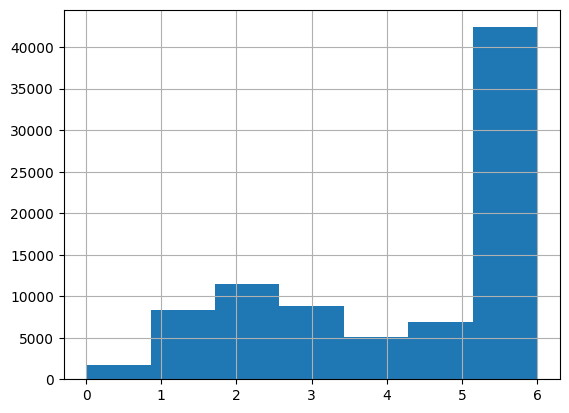

In [3]:
# ['Triclinic', 'Monoclinic', 'Orthorombic', 'Tetragonal', 'Trigonal', 'Hexagonal', 'Cubic']
data_balanced['crystal_system'].hist(bins=7)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    2.5s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.6s finished


10CV score:  83.42650909348241


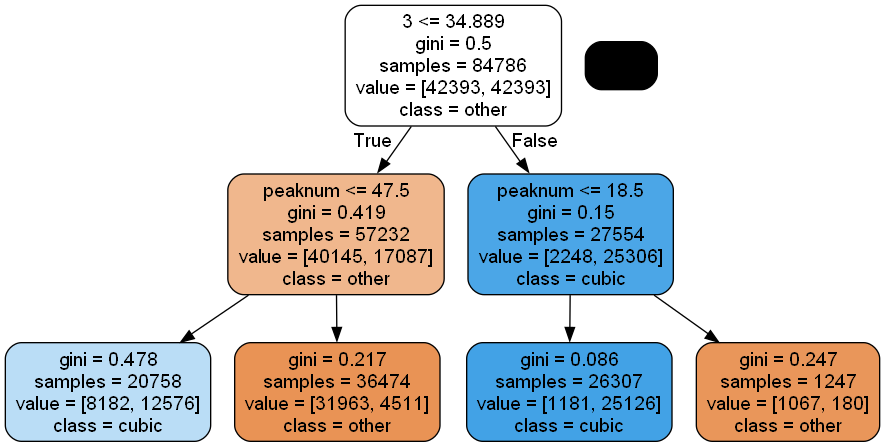

In [4]:
X = data_balanced[[str(i) for i in range(1, 11)] + ['peaknum']]
y = data_balanced['is_cubic']

clf = DecisionTreeClassifier(criterion='gini',
                             max_features=8,
                             min_samples_leaf=1,
                             min_samples_split=2,
                             max_depth=2, random_state=8)
pred_cv = cross_val_predict(clf, X, y,
                            cv=10,
                            n_jobs=-1,
                            verbose=2)
clf.fit(X, y)

print('10CV score: ', metrics.accuracy_score(y, pred_cv)*100)

dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data,
                     feature_names=list(X.columns),
                     class_names=['other', 'cubic'],
                     filled=True,
                     rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png(), retina=True,unconfined=True)

Confusion matrix, without normalization


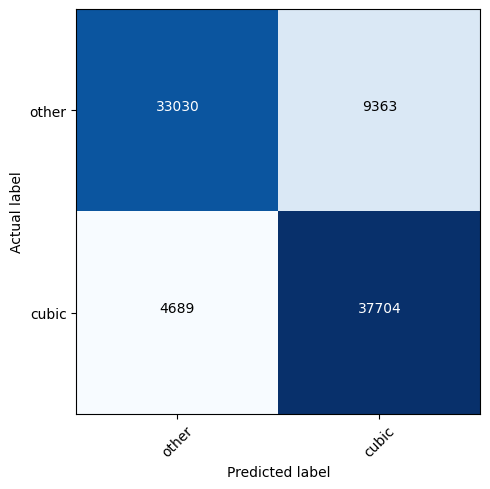

In [5]:
classnames = ['Triclinic', 'Monoclinic', 'Orthorombic', 'Tetragonal', 'Trigonal', 'Hexagonal']

cnf_matrix = metrics.confusion_matrix(y, pred_cv)
plot_confusion_matrix(cnf_matrix, classes=['other', 'cubic'])

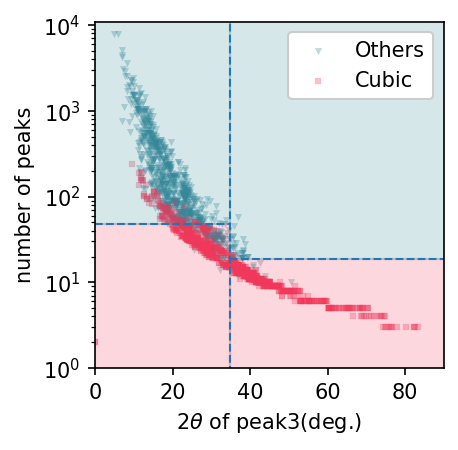

In [6]:
import matplotlib.patches as pat

fig = plt.figure(figsize=(3,3), dpi=150)
ax = fig.add_subplot(111)
ax.scatter(X[y == 0]["3"][:1000], X[y == 0]['peaknum'][:1000], c = '#348899', marker = 'v', alpha = 0.3, s=10, label = 'Others', lw=0.1)
ax.scatter(X[y == 1]["3"][:1000], X[y == 1]['peaknum'][:1000], c = '#F2385A', marker = 's', alpha = 0.3, s=10, label = 'Cubic', lw=0.1)
ax.set_yscale('log')
ax.set_xlim(0, 90)
ax.set_ylim(1, 11000)
legend = ax.legend(framealpha=1)

ax.set_xlabel(r'2$\theta$ of peak3(deg.)')
ax.set_ylabel('number of peaks')
plt.vlines(34.9, 0, 20000, linestyles='--', lw = 1) #vline→3rd peak pos
plt.hlines(47.5,0, 34.9, linestyles='--', lw = 1) # hline→peaknum
plt.hlines(18.5,34.9, 90, linestyles='--', lw = 1) # hline→peaknum

rec_cubic1 = pat.Rectangle(xy = (34.9, 0), width = 90-34.9, height = 18.5, angle = 0, color = "#F2385A", alpha = 0.2)
rec_other1 = pat.Rectangle(xy = (34.9, 18.5), width = 90-34.9, height = 20000-18.5, angle = 0, color = "#348899", alpha = 0.2)
rec_cubic2 = pat.Rectangle(xy = (0, 0), width = 34.9, height = 47.5, angle = 0, color = "#F2385A", alpha = 0.2)
rec_other2 = pat.Rectangle(xy = (0, 47.5), width = 34.9, height = 20000-18.5, angle = 0, color = "#348899", alpha = 0.2)

ax.add_patch(rec_cubic1)
ax.add_patch(rec_other1)
ax.add_patch(rec_cubic2)
ax.add_patch(rec_other2)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.7s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.0s finished


10CV score:  83.18826221310121


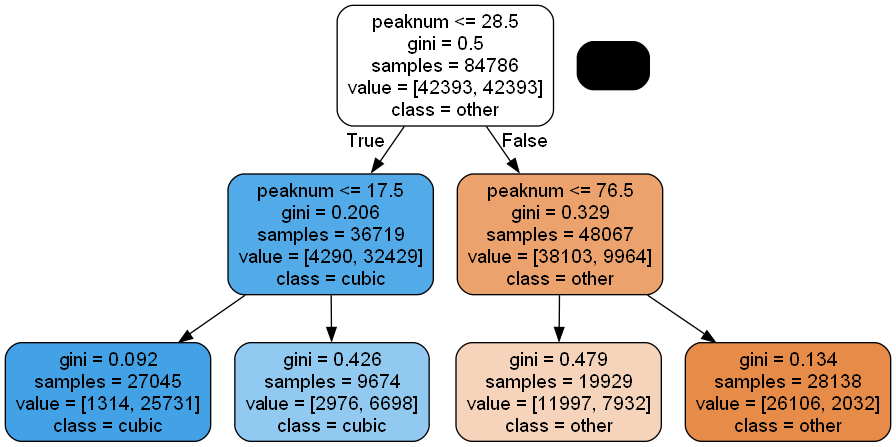

In [7]:
X = data_balanced[[str(i) for i in range(1, 11)] + ['peaknum']]
y = data_balanced['is_cubic']

clf = DecisionTreeClassifier(criterion='gini',
                             max_features=8,
                             min_samples_leaf=1,
                             min_samples_split=2,
                             max_depth=2, random_state=9)
pred_cv = cross_val_predict(clf, X, y,
                            cv=10,
                            n_jobs=-1,
                            verbose=2)
clf.fit(X, y)

print('10CV score: ', metrics.accuracy_score(y, pred_cv)*100)

dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data,
                     feature_names=list(X.columns),
                     class_names=['other', 'cubic'],
                     filled=True,
                     rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png(), retina=True,unconfined=True)

Confusion matrix, without normalization


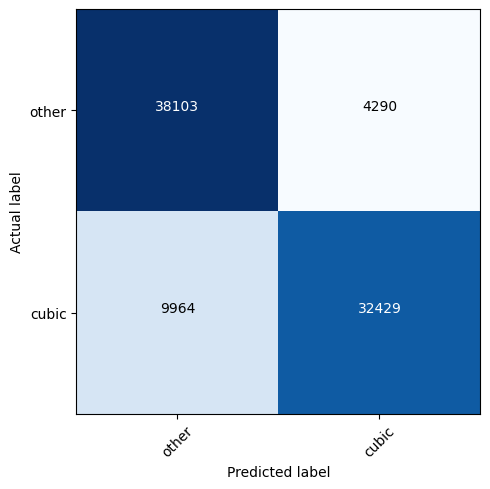

In [8]:
classnames = ['Triclinic', 'Monoclinic', 'Orthorombic', 'Tetragonal', 'Trigonal', 'Hexagonal']

cnf_matrix = metrics.confusion_matrix(y, pred_cv)
plot_confusion_matrix(cnf_matrix, classes=['other', 'cubic'])

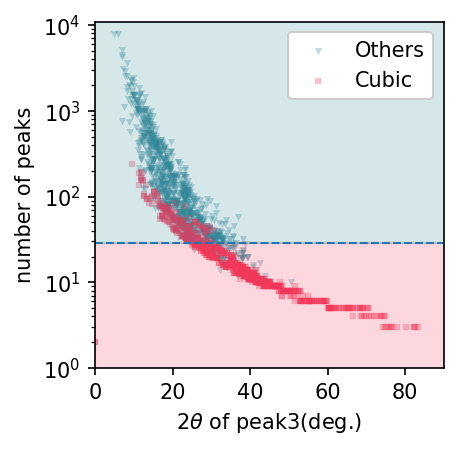

In [9]:
import matplotlib.patches as pat

fig = plt.figure(figsize=(3,3), dpi=150)
ax = fig.add_subplot(111)
ax.scatter(X[y == 0]["3"][:1000], X[y == 0]['peaknum'][:1000], c = '#348899', marker = 'v', alpha = 0.3, s=10, label = 'Others', lw=0.1)
ax.scatter(X[y == 1]["3"][:1000], X[y == 1]['peaknum'][:1000], c = '#F2385A', marker = 's', alpha = 0.3, s=10, label = 'Cubic', lw=0.1)
ax.set_yscale('log')
ax.set_xlim(0, 90)
ax.set_ylim(1, 11000)
legend = ax.legend(framealpha=1)

ax.set_xlabel(r'2$\theta$ of peak3(deg.)')
ax.set_ylabel('number of peaks')
plt.hlines(28.5, 0, 90, linestyles='--', lw = 1) # hline→peaknum

rec_cubic1 = pat.Rectangle(xy = (0, 0), width = 90, height = 28.5, angle = 0, color = "#F2385A", alpha = 0.2)
rec_other1 = pat.Rectangle(xy = (0, 28.5), width = 90, height = 20000-28.5, angle = 0, color = "#348899", alpha = 0.2)
ax.add_patch(rec_cubic1)
ax.add_patch(rec_other1)